In [7]:
%pwd

'/Users/me/code/sys_survey'

In [6]:
# available data
%ls -la

total 5608
drwxr-xr-x  11 me  staff      352 Aug  2 21:55 ./
drwxr-xr-x  29 me  staff      928 Aug  2 21:10 ../
drwxr-xr-x   3 me  staff       96 Aug  2 21:50 .ipynb_checkpoints/
-rw-r--r--@  1 me  staff   117152 Jul 30 15:26 Codeplan.xlsx
-rw-r--r--@  1 me  staff   885120 Aug  2 21:14 Data_Master_file_15.csv
-rw-r--r--@  1 me  staff  1240847 Jul 30 15:26 Data_Master_file_15.xlsx
-rw-r--r--   1 me  staff      203 Aug  2 21:44 Pipfile
-rw-r--r--@  1 me  staff    34419 Jul 30 15:26 SyntaxRun.txt
-rw-r--r--@  1 me  staff   570310 Jul 30 15:26 WP3_Survey_Standard_Final.pdf
-rw-r--r--   1 me  staff     1810 Aug  2 21:55 survey_v01.ipynb
-rw-r--r--@  1 me  staff      165 Aug  2 21:11 ~$Codeplan.xlsx


In [906]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
sns.set(style="ticks")

In [932]:
# reading raw data
cvs = "/Users/me/code/sys_survey/Data_Master_file_15.csv"
data = pd.read_csv(cvs, sep=";", encoding = 'utf-8', decimal='.')
shape_before = data.shape
print(shape_before)
data.head()




(1322, 224)


,ID,Participant_ID,link,lang,cs1,cs1_filter,cs2,cs3,cs4,cs5,...,v28.3,v28.4,v28.5,v17_filter,v20_filter,v20_filter2,v21_filter,v21_filter2,country,Partner
0,A011,A0101,075901,English,1,99,99.0,99.0,99.0,99.0,...,3.0,3.0,4.0,0,2,1,2,1,1,A
1,A012,A0103,467820,English,1,99,99.0,3.0,1.0,99.0,...,3.0,3.0,1.0,0,1,0,1,0,1,A
2,A013,A0104,464072,English,2,99,99.0,99.0,99.0,99.0,...,4.0,3.0,4.0,0,1,1,2,1,1,A
3,A014,A0105,761912,English,1,99,8.0,10.0,99.0,99.0,...,3.0,3.0,2.0,0,2,1,2,1,1,A
4,A015,A0106,966655,English,1,99,8.0,10.0,99.0,99.0,...,3.0,99.0,4.0,1,1,0,1,0,1,A


In [933]:
# parent_information
data.rename(columns={
    'cs1':'guard_who',
    'cs1_filter':'guard_who_other',
    'cs2':'educ_mum',
    'cs3':'job_mum',
    'cs4':'educ_dad',
    'cs5':'job_dad',
    'cs6':'educ_guard',
    'cs7':'job_guard',
    }, 
    inplace=True)

In [934]:
# 1. HOW OFTEN do you do the following activities outside of school hours? 
# 2. If you had to pick just one of the activities from the list above 
#    (including the ones you added), which ONE do you like most?
# 3. WHO do you usually do this activity with?
# 4. Groups I’m part of or would like to join / Groups I have been part of for some time
data.rename(columns={
    'v1.1':'freq_library',
    'v1.2':'freq_zoo',
    'v1.3':'freq_museum',
    'v1.4':'freq_classes',
    'v1.5':'freq_cook',
    'v1.6':'freq_teamsport',
    'v1.7':'freq_indsport',
    'v1.8':'freq_out',
    'v1.9':'freq_plant',
    'v1.10':'freq_ex',
    'v1.11':'freq_read',
    'v1.12':'freq_learn',
    'v1.13':'freq_game',
    'v1.14':'freq_socialm',
    'v1.15':'freq_video',
    'v1.16':'freq_build',
    'v1.17':'freq_pet',
    'v1.18':'freq_sing',
    'v1.19':'freq_listen',
    'v1.20':'freq_other',
    'v1.20_filter':'freq_otherfilt',
    'v2':'favact',
    'v3.1':'favact_sup_par',
    'v3.2':'favact_sup_sib',
    'v3.3':'favact_sup_rel',
    'v3.4':'favact_sup_teach',
    'v3.5':'favact_sup_fri',
    'v3.6':'favact_sup_me',
    'v3.7':'favact_sup_par',
    'v3.7_filter':'fact_sup_other',
    'v4.1':'group_sport',
    'v4.2':'group_scout',
    'v4.3':'group_music',
    'v4.4':'group_arts',
    'v4.5':'group_care',
    'v4.6':'group_reli',
    'v4.7':'group_other',
    'v4.7_filter':'group_otherfilt',
    }, 
    inplace=True)

In [935]:
# 5. Who encourages you to do the things you do?
# 6. How do you feel when you think of ‘SCIENCE’? 
# 7. Aretheresciencetopicsthatyoufindparticularlyinteresting?
# 8. If yes, which ones? Please list them in the box below!

data.rename(columns={
    'v5.1.1':'sup_mus_no',
    'v5.1.2':'sup_mus_par',
    'v5.1.3':'sup_mus_sib',
    'v5.1.4':'sup_mus_rel',
    'v5.1.5':'sup_mus_teach',
    'v5.1.6':'sup_mus_frie',
    'v5.1.7':'sup_mus_me',
    'v5.2.1':'sup_lib_no',
    'v5.2.2':'sup_lib_par',
    'v5.2.3':'sup_lib_sib',
    'v5.2.4':'sup_lib_rel',
    'v5.2.5':'sup_lib_teach',
    'v5.2.6':'sup_lib_frie',
    'v5.2.7':'sup_lib_me',
    'v5.3.1':'sup_sport_no',
    'v5.3.2':'sup_sport_par',
    'v5.3.3':'sup_sport_sib',
    'v5.3.4':'sup_sport_rel',
    'v5.3.5':'sup_sport_teach',
    'v5.3.6':'sup_sport_frie',
    'v5.3.7':'sup_sport_me',
    'v5.4.1':'sup_out_no',
    'v5.4.2':'sup_out_par',
    'v5.4.3':'sup_out_sib',
    'v5.4.4':'sup_out_rel',
    'v5.4.5':'sup_out_teach',
    'v5.4.6':'sup_out_frie',
    'v5.4.7':'sup_out_me',
    'v5.5.1':'sup_plant_no',
    'v5.5.2':'sup_plant_par',
    'v5.5.3':'sup_plant_sib',
    'v5.5.4':'sup_plant_rel',
    'v5.5.5':'sup_plant_teach',
    'v5.5.6':'sup_plant_frie',
    'v5.5.7':'sup_plant_me',
    'v5.6.1':'sup_cook_no',
    'v5.6.2':'sup_cook_par',
    'v5.6.3':'sup_cook_sib',
    'v5.6.4':'sup_cook_rel',
    'v5.6.5':'sup_cook_teach',
    'v5.6.6':'sup_cook_frie',
    'v5.6.7':'sup_cook_me',
    'v5.7.1':'sup_read_no',
    'v5.7.2':'sup_read_par',
    'v5.7.3':'sup_read_sib',
    'v5.7.4':'sup_read_rel',
    'v5.7.5':'sup_read_teach',
    'v5.7.6':'sup_read_frie',
    'v5.7.7':'sup_read_me',
    'v5.8.1':'sup_learn_no',
    'v5.8.2':'sup_learn_par',
    'v5.8.3':'sup_learn_sib',
    'v5.8.4':'sup_learn_rel',
    'v5.8.5':'sup_learn_teach',
    'v5.8.6':'sup_learn_frie',
    'v5.8.7':'sup_learn_me',
    'v5.9.1':'sup_video_no',
    'v5.9.2':'sup_video_par',
    'v5.9.3':'sup_video_sib',
    'v5.9.4':'sup_video_rel',
    'v5.9.5':'sup_video_teach',
    'v5.9.6':'sup_video_frie',
    'v5.9.7':'sup_video_me',
    'v5.10.1':'sup_build_no',
    'v5.10.2':'sup_build_par',
    'v5.10.3':'sup_build_sib',
    'v5.10.4':'sup_build_rel',
    'v5.10.5':'sup_build_teach',
    'v5.10.6':'sup_build_frie',
    'v5.10.7':'sup_build_me',
    'v5.11.1':'sup_pet_no',
    'v5.11.2':'sup_pet_par',
    'v5.11.3':'sup_pet_sib',
    'v5.11.4':'sup_pet_rel',
    'v5.11.5':'sup_pet_teach',
    'v5.11.6':'sup_pet_frie',
    'v5.11.7':'sup_pet_me',
    'v5.12.1':'sup_music_no',
    'v5.12.2':'sup_music_par',
    'v5.12.3':'sup_music_sib',
    'v5.12.4':'sup_music_rel',
    'v5.12.5':'sup_music_teach',
    'v5.12.6':'sup_music_frie',
    'v5.12.7':'sup_music_me',
    'v5.13.1':'sup_favact_no',
    'v5.13.2':'sup_favact_par',
    'v5.13.3':'sup_favact_sib',
    'v5.13.4':'sup_favact_rel',
    'v5.13.5':'sup_favact_teach',
    'v5.13.6':'sup_favact_frie',
    'v5.13.7':'sup_favact_me',
    'v5.13_filter':'sup_favact_filt',
    'v6.1 ':'feel_int',
    'v6.2':'feel_mean',
    'v6.3':'feel_emo',
    'v7':'topics',
    'v8.1':'topics_which',
    'v8.2':'topics_nwhich',
    'v9.1':'attit_science',
    'v9.2':'attit_ease',
    'v9.3':'attit_friendslike',
    'v9.4':'attit_mothertalk',
    'v9.5':'attit_interest',
    'v9.6':'attit_job',
    'v9.7':'attit_life',
    'v9.8':'attit_friendsenjoy',
    'v9.9':'attit_parentsint',
    'v9.10':'attit_scienceworld',
    'v9.11':'attit_fathertalk',
    'v9.12':'attit_family',
    'v9.13':'attit_thinking',
    'v9.14':'attit_sciencenot',
    }, 
    inplace=True)

In [936]:
# 10. Please choose your circumstances: (More than one answer is possible)
# 11. Which, if any of these, is your favourite subject at school?
# 12. In general, how do your teachers perceive your achievement at school?
# 13. Below you find two statements. Some people agree with them and others do not. What do you think?

data.rename(columns={
    'v10.1':'circ_school',
    'v10.2':'circ_appr',
    'v10.3':'circ_empl',
    'v10.4':'circ_volunt',
    'v10.5':'circ_unempl',
    'v10.6':'circ_unempl_not',
    'v10.7':'circ_carer',
    'v10.8':'circ_milit',
    'v10.9':'circ_other',
    'v10.9_filter':'circ_other_filt',
    'v11':'fav_subj',
    'v11_filter':'fav_subj_otherfilt',
    'v12':'school',
    'v13.1':'lessons_exc',
    'v13.2':'lessons_look',
    }, 
    inplace=True)

In [937]:
data.rename(columns={
    'v14':'age',
    'v15':'gender',
    'v15_filter':'gender_nb',
    'v16':'place_live',
    'v17':'country_birth',
    'v18':'country_foreign',
    'v19':'lang_first',
    'v19_filter':'lang_firstfilt',
    'v20':'lang_adult',
    'v21':'lang_home',
    'v22':'home_n',
    }, 
    inplace=True)

In [874]:
# circumvent dataframe printing limitations 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

with pd.option_context('display.max_rows', None, 'display.max_columns', 100):
    print (data.head())
    

     ID Participant_ID    link     lang  guard_who guard_who_other  educ_mum  \
0  A011          A0101  075901  English          1              99      99.0   
1  A012          A0103  467820  English          1              99      99.0   
2  A013          A0104  464072  English          2              99      99.0   
3  A014          A0105  761912  English          1              99       8.0   
4  A015          A0106  966655  English          1              99       8.0   

   job_mum  educ_dad  job_dad  educ_guard  job_guard  freq_library  freq_zoo  \
0     99.0      99.0     99.0        99.0         99           3.0         2   
1      3.0       1.0     99.0        99.0         99           1.0         2   
2     99.0      99.0     99.0        99.0         99           2.0         2   
3     10.0      99.0     99.0        99.0         99           2.0         1   
4     10.0      99.0     99.0        99.0         99           1.0         2   

   freq_museum  freq_classes  freq_coo

In [938]:
print(shape_before) 

# check upon feel_int??
columns = ['gender','age','place_live','attit_science','lessons_look','attit_life','feel_mean','feel_emo','attit_parentsint']
data = data [columns].dropna()

#If we drop ANY row that contains NaN // not a number / missing value (not representable)
#data = data.dropna(axis='index',how='any')
#Before: 1322
#After: 1177

print(data.shape[0])  #df.shape[1] provides columns 


(1322, 224)
1312


In [922]:
data.head()

,gender,age,place_live,attit_science,lessons_look,attit_life,feel_mean,feel_emo,attit_parentsint
0,2.0,16,2,4.0,3,5,5,3,5
1,1.0,16,1,5.0,5,5,5,5,2
2,1.0,15,3,5.0,5,4,4,5,3
3,1.0,15,3,5.0,5,5,5,5,4
4,1.0,15,1,5.0,5,5,5,5,5


In [948]:
# just an example for extracting 'int' from String via regex 
import re

str ='10,23'
p = re.compile(r'([^,]+)')
i = re.search(p, str).group(1)
i
 

'10'

In [939]:
# clean up age .. to be 'int' and have no comma 

import re 
p = re.compile(r'([^,]+)')


# columns = ['gender','age','place_live','attit_science','lessons_look','attit_life','feel_mean','feel_emo','attit_parentsint']
# table = data [columns].dropna()

for k,v in enumerate(data['age']): 
    data['age'][k]=re.search(p, v).group(1)
data['age'] = data['age'].astype('int') 

print(data.shape[0]) 

# SettingWithCopyWarning in Pandas? https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas 

1312


/Users/me/.local/share/virtualenvs/sys_survey-wEJ_5-IX/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [940]:
data.describe(include=['int','object','float'])

,gender,age,place_live,attit_science,lessons_look,attit_life,feel_mean,feel_emo,attit_parentsint
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,4.016768,13.651677,3.644817,4.821646,5.041921,5.887957,7.400152,7.658537,5.259909
std,15.506393,2.863779,10.952100,9.495282,12.916226,14.058191,18.461226,18.776436,13.907682
min,1.000000,8.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,2.000000,14.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,2.000000,16.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
max,99.000000,20.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [941]:
col = data.columns
col

Index(['gender', 'age', 'place_live', 'attit_science', 'lessons_look',
       'attit_life', 'feel_mean', 'feel_emo', 'attit_parentsint'],
      dtype='object')

In [942]:
for c in col:
    print(data.groupby(c).size())
    print ('**************************')

gender
1.0     655
2.0     620
3.0       3
99.0     34
dtype: int64
**************************
age
8       7
9      97
10    133
11    132
12    134
13    104
14    132
15    172
16    189
17     90
18     75
19     32
20     15
dtype: int64
**************************
place_live
1     170
2     446
3     679
99     17
dtype: int64
**************************
attit_science
1.0      79
2.0      91
3.0     212
4.0     443
5.0     474
99.0     13
dtype: int64
**************************
lessons_look
0      77
1     127
2     148
3     249
4     366
5     321
99     24
dtype: int64
**************************
attit_life
1     103
2      95
3     260
4     344
5     481
99     29
dtype: int64
**************************
feel_mean
1      74
2      63
3     411
4     338
5     375
99     51
dtype: int64
**************************
feel_emo
1      39
2      66
3     403
4     334
5     417
99     53
dtype: int64
**************************
attit_parentsint
1     189
2     168
3     346
4     339
5   

In [946]:
# from Series onject 'groupby' to DataFrame 
# just an example wif df 'd'


d=data.groupby(['place_live','feel_emo']).size()
print (type(d)) #series object
print(d.index)  #multiindex
print(d.values)
print ('************ group by tabel ************')
print(d)
d=d.reset_index() # pull out grouping dimensions 
d = d.rename(columns = {'place_live':'location','feel_emo':'emotions',0:'frequency'}) # important to indidcate 'columns', otherwise '0' is understood a row label 
print(d)

# if d as a series object should be renamed ... above the df is renamed 
# d = d.rename({'index':'Age','age':'Frequency'}, axis=1) #axis param was important,  
# by default it's index which means row lables are renamed, also index = 0, columns = 1   
# table = table.rename({0:'test'}, axis='index')

<class 'pandas.core.series.Series'>
MultiIndex([( 1,  1),
            ( 1,  2),
            ( 1,  3),
            ( 1,  4),
            ( 1,  5),
            ( 1, 99),
            ( 2,  1),
            ( 2,  2),
            ( 2,  3),
            ( 2,  4),
            ( 2,  5),
            ( 2, 99),
            ( 3,  1),
            ( 3,  2),
            ( 3,  3),
            ( 3,  4),
            ( 3,  5),
            ( 3, 99),
            (99,  2),
            (99,  3),
            (99,  4),
            (99,  5),
            (99, 99)],
           names=['place_live', 'feel_emo'])
[  3   7  44  41  68   7   8  21 130 130 148   9  28  37 220 161 198  35
   1   9   2   3   2]
************ group by tabel ************
place_live  feel_emo
1           1             3
            2             7
            3            44
            4            41
            5            68
            99            7
2           1             8
            2            21
            3           130
   

location     int64
emotions     int64
frequency    int64
dtype: object

(1309, 9)
(1155, 9)


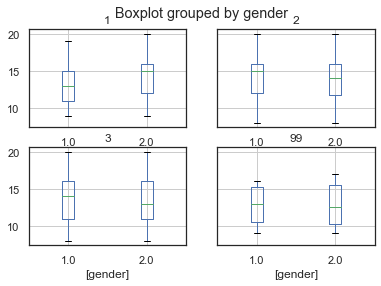

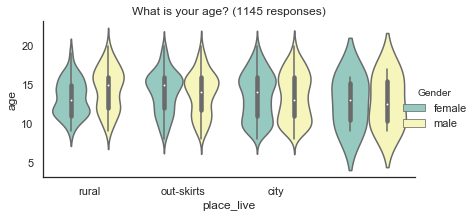

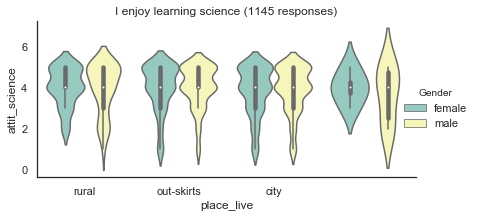

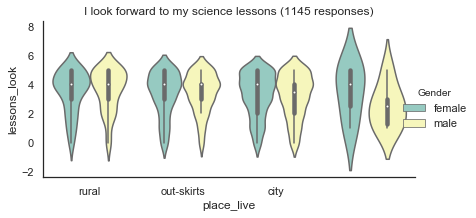

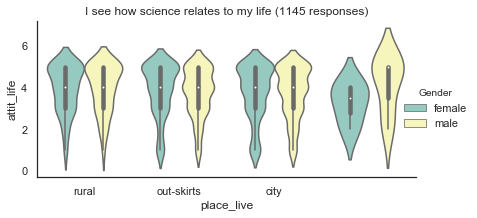

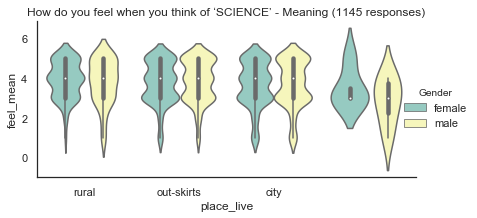

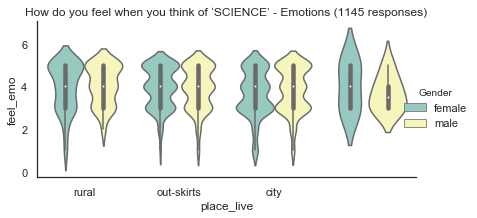

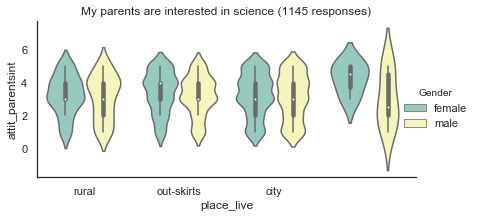

In [958]:
# df column selection alway double brackets [[ .. ]]

table = data 
table = table.drop(table[(table.gender ==3)].index)

print(table.shape)
 
for c in columns:
    table.drop(table[table[c] == 99].index, inplace = True) 
    
print(table.shape)

'''
(1) dataframe grouped by 'column' equals canvases 
(2) column in boxplot is the actual data 
(3) which again can be splitted by a classifier column such as gender 
'''
table.groupby('place_live').boxplot(column=['age'], by=['gender'])



factors = [
     ('age','What is your age?'),
     ('attit_science','I enjoy learning science'),
     ('lessons_look','I look forward to my science lessons'),
     ('attit_life','I see how science relates to my life'),
     ('feel_mean','How do you feel when you think of ‘SCIENCE’ - Meaning'),
     ('feel_emo','How do you feel when you think of ‘SCIENCE’ - Emotions'),
     ('attit_parentsint','My parents are interested in science')]

for f,q in factors:
    g = sns.catplot(kind='violin',        # or box for Boxplot 
                orient='v',           # vertical orientation 
                   y=f,       # Y-axis - values for boxplot
                   x='place_live',        # X-axis - first factor
                   hue='gender',         # Second factor denoted by color
                   data=table,        # Dataframe 
                   height=3,            # Figure size (x100px)      
                   aspect=2,        # Width = size * aspect 
                   palette=("Set3"),
                   linewidth=1.5, 
                   legend_out=True)
    plt.title(q+' (1145 responses)') # You can comment this line out if you don't need title
    g.set_xticklabels (['rural','out-skirts','city'])
    g._legend.set_title('Gender')
    # change legend see here: https://stackoverflow.com/questions/45201514/edit-seaborn-legend
    new_labels = ['female', 'male']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.show(g) 
 



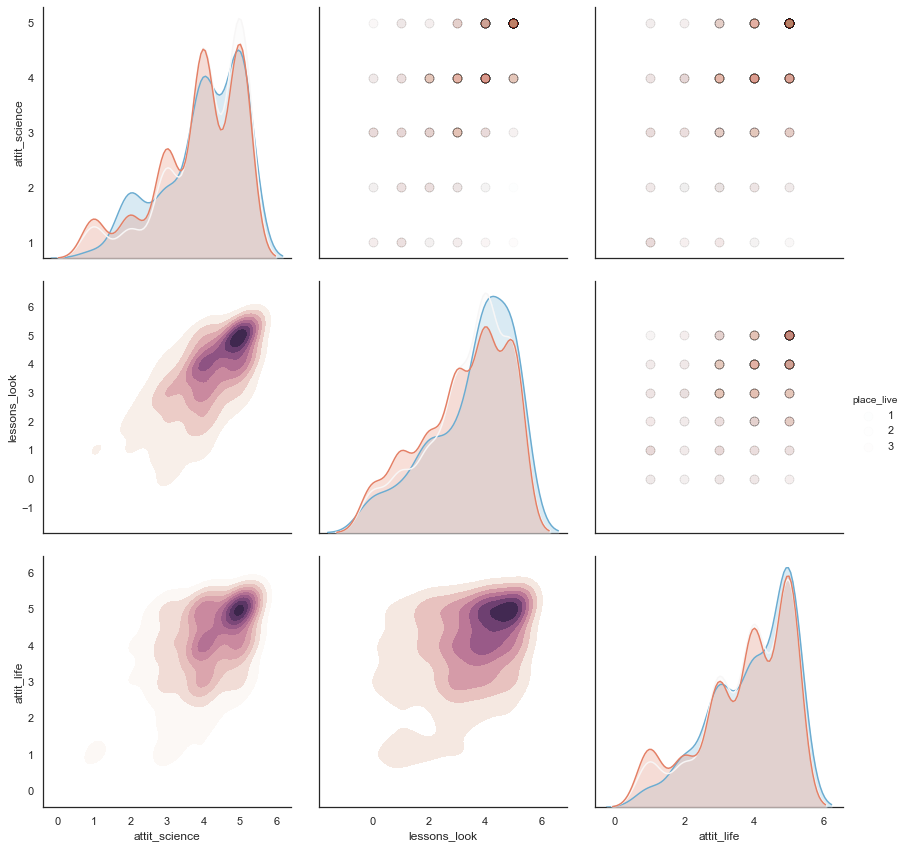

In [952]:
# palettes https://seaborn.pydata.org/tutorial/color_palettes.html 

sns.set(style="white")
grid = sns.pairplot(table, 
             vars = ['attit_science','lessons_look','attit_life'],
             palette = "RdBu_r",
             hue = 'place_live',
             diag_kind = 'kde',
             plot_kws = {'alpha': 0.01, 's': 80, 'edgecolor': 'k'},
             height = 4)
#grid = grid.map_upper(plt.scatter, color = 'green', alpha=0.01, s = 150, edgecolor = 'k')
#grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, 
                      cmap = sns.cubehelix_palette(light=1.1, as_cmap=True), 
                      shade=True)
# grid = grid.map_diag(plt.hist, bins = 5, edgecolor =  'k', color = 'darkred');

#new thing 
#grid = grid.map(sns.jointplot, edgecolor =  'k');

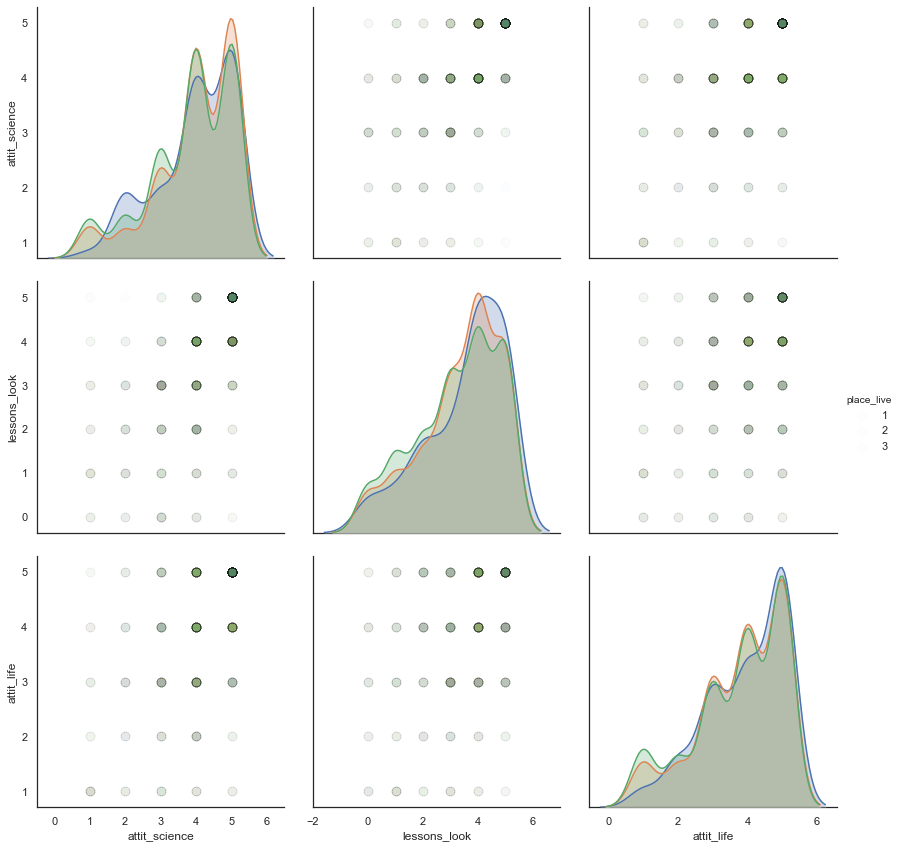

In [953]:
# Plot colored by continent for years 2000-2007
sns.pairplot(table, 
             vars = ['attit_science','lessons_look','attit_life'], 
             hue = 'place_live', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.01, 's': 80, 'edgecolor': 'k'},
             height = 4);
# Title 
plt.suptitle('', 
             size = 28);

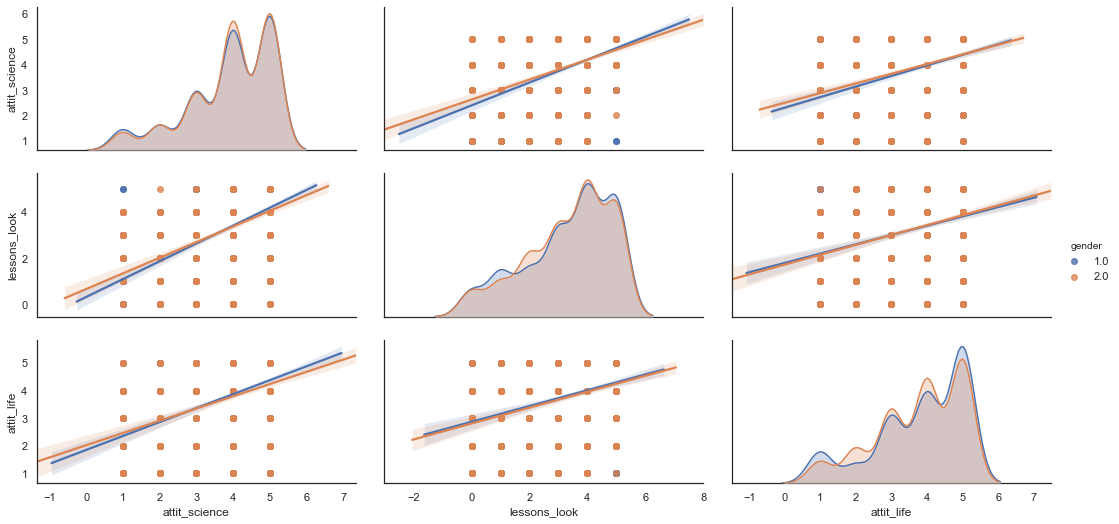

In [954]:
sns.pairplot(table, vars = ['attit_science','lessons_look','attit_life'], kind='reg', hue = 'gender',aspect=2, markers="o", diag_kind='kde')

In [955]:
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    
# Mann-Whitney U test
from scipy.stats import mannwhitneyu 

columns = ['gender','age','attit_science','lessons_look','attit_life','feel_mean','feel_emo','attit_parentsint']

# select target variable from 'columns', one by one
# place_live provides the 2 groups to be compared 
for c in columns:
    data1 = table.loc[data['place_live'] < 3 ][c] #countryside & outskirts 
    data2 = table.loc[data['place_live'] == 3][c]  #city

    # compare samples
    print('****************************')
    print (' ')
    print(f"{c}: Comparing groups 'living in countryside/outskirts' and 'living in city'")
    data1_m = data1.mean()
    data2_m = data2.mean()
    print(f"Mean of group 'countryside/outskirts': {data1_m:.2f}")
    print(f"Mean of group 'city'                 : {data2_m:.2f}")
    stat, p = mannwhitneyu(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    # interpretation
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

    
    

****************************
 
gender: Comparing groups 'living in countryside/outskirts' and 'living in city'
Mean of group 'countryside/outskirts': 1.48
Mean of group 'city'                 : 1.49
Statistics=161609.000, p=0.337
Same distribution (fail to reject H0)
****************************
 
age: Comparing groups 'living in countryside/outskirts' and 'living in city'
Mean of group 'countryside/outskirts': 13.97
Mean of group 'city'                 : 13.50
Statistics=148595.000, p=0.003
Different distribution (reject H0)
****************************
 
attit_science: Comparing groups 'living in countryside/outskirts' and 'living in city'
Mean of group 'countryside/outskirts': 4.00
Mean of group 'city'                 : 3.84
Statistics=151652.000, p=0.012
Different distribution (reject H0)
****************************
 
lessons_look: Comparing groups 'living in countryside/outskirts' and 'living in city'
Mean of group 'countryside/outskirts': 3.42
Mean of group 'city'               

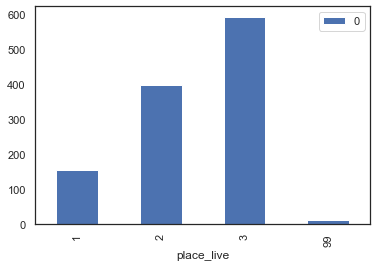

<class 'pandas.core.frame.DataFrame'>


In [959]:
#table = table.reindex()

place_dist = table.groupby('place_live').size().reset_index() #Serie to dict 
#table.age = table.age.astype(float)
place_dist.plot(x= 'place_live', kind='bar')
plt.show()
#df[df.age == 99]

print (type(table))


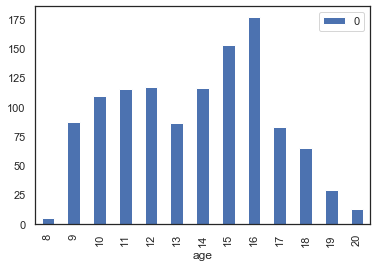

In [963]:
#table = table.reindex()

age_dist = table.groupby('age').size().reset_index() #Serie to dict 
#table.age = table.age.astype(float)
age_dist.plot(x= 'age', kind='bar')
plt.show()
#df[df.age == 99]
               